In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import pandas
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split , GridSearchCV
import seaborn as sns

reading CSV file and printing a co-relation heatmap to find most corelated features

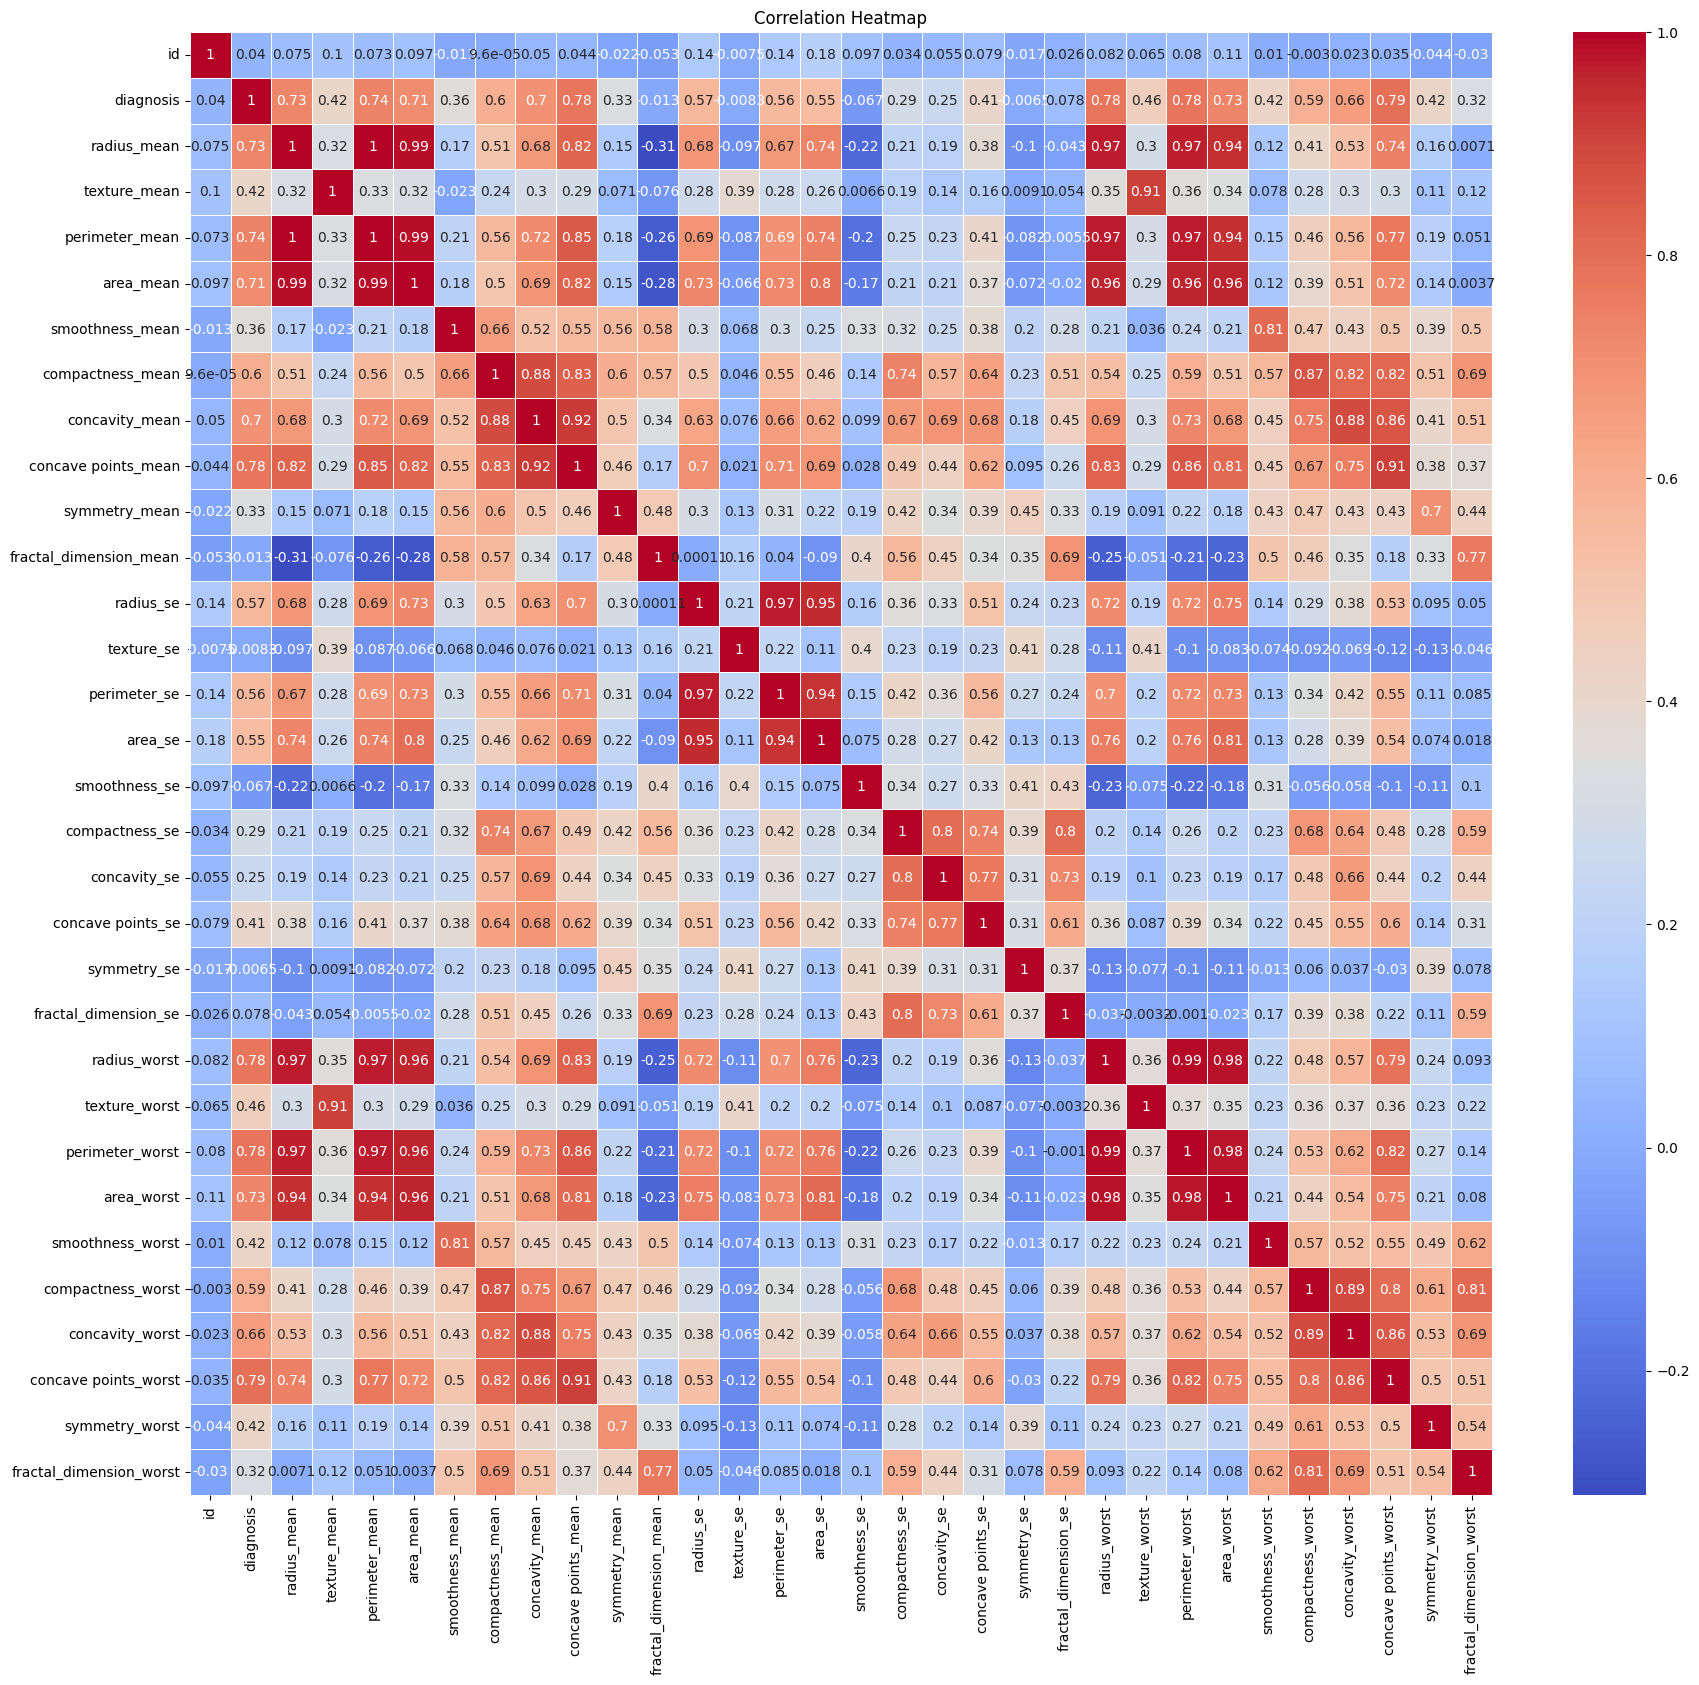

In [59]:
df = pandas.read_csv("breast-cancer.csv")

df['diagnosis'] = (df['diagnosis'] == 'M')
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(21,19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

making pair plot to understand scale

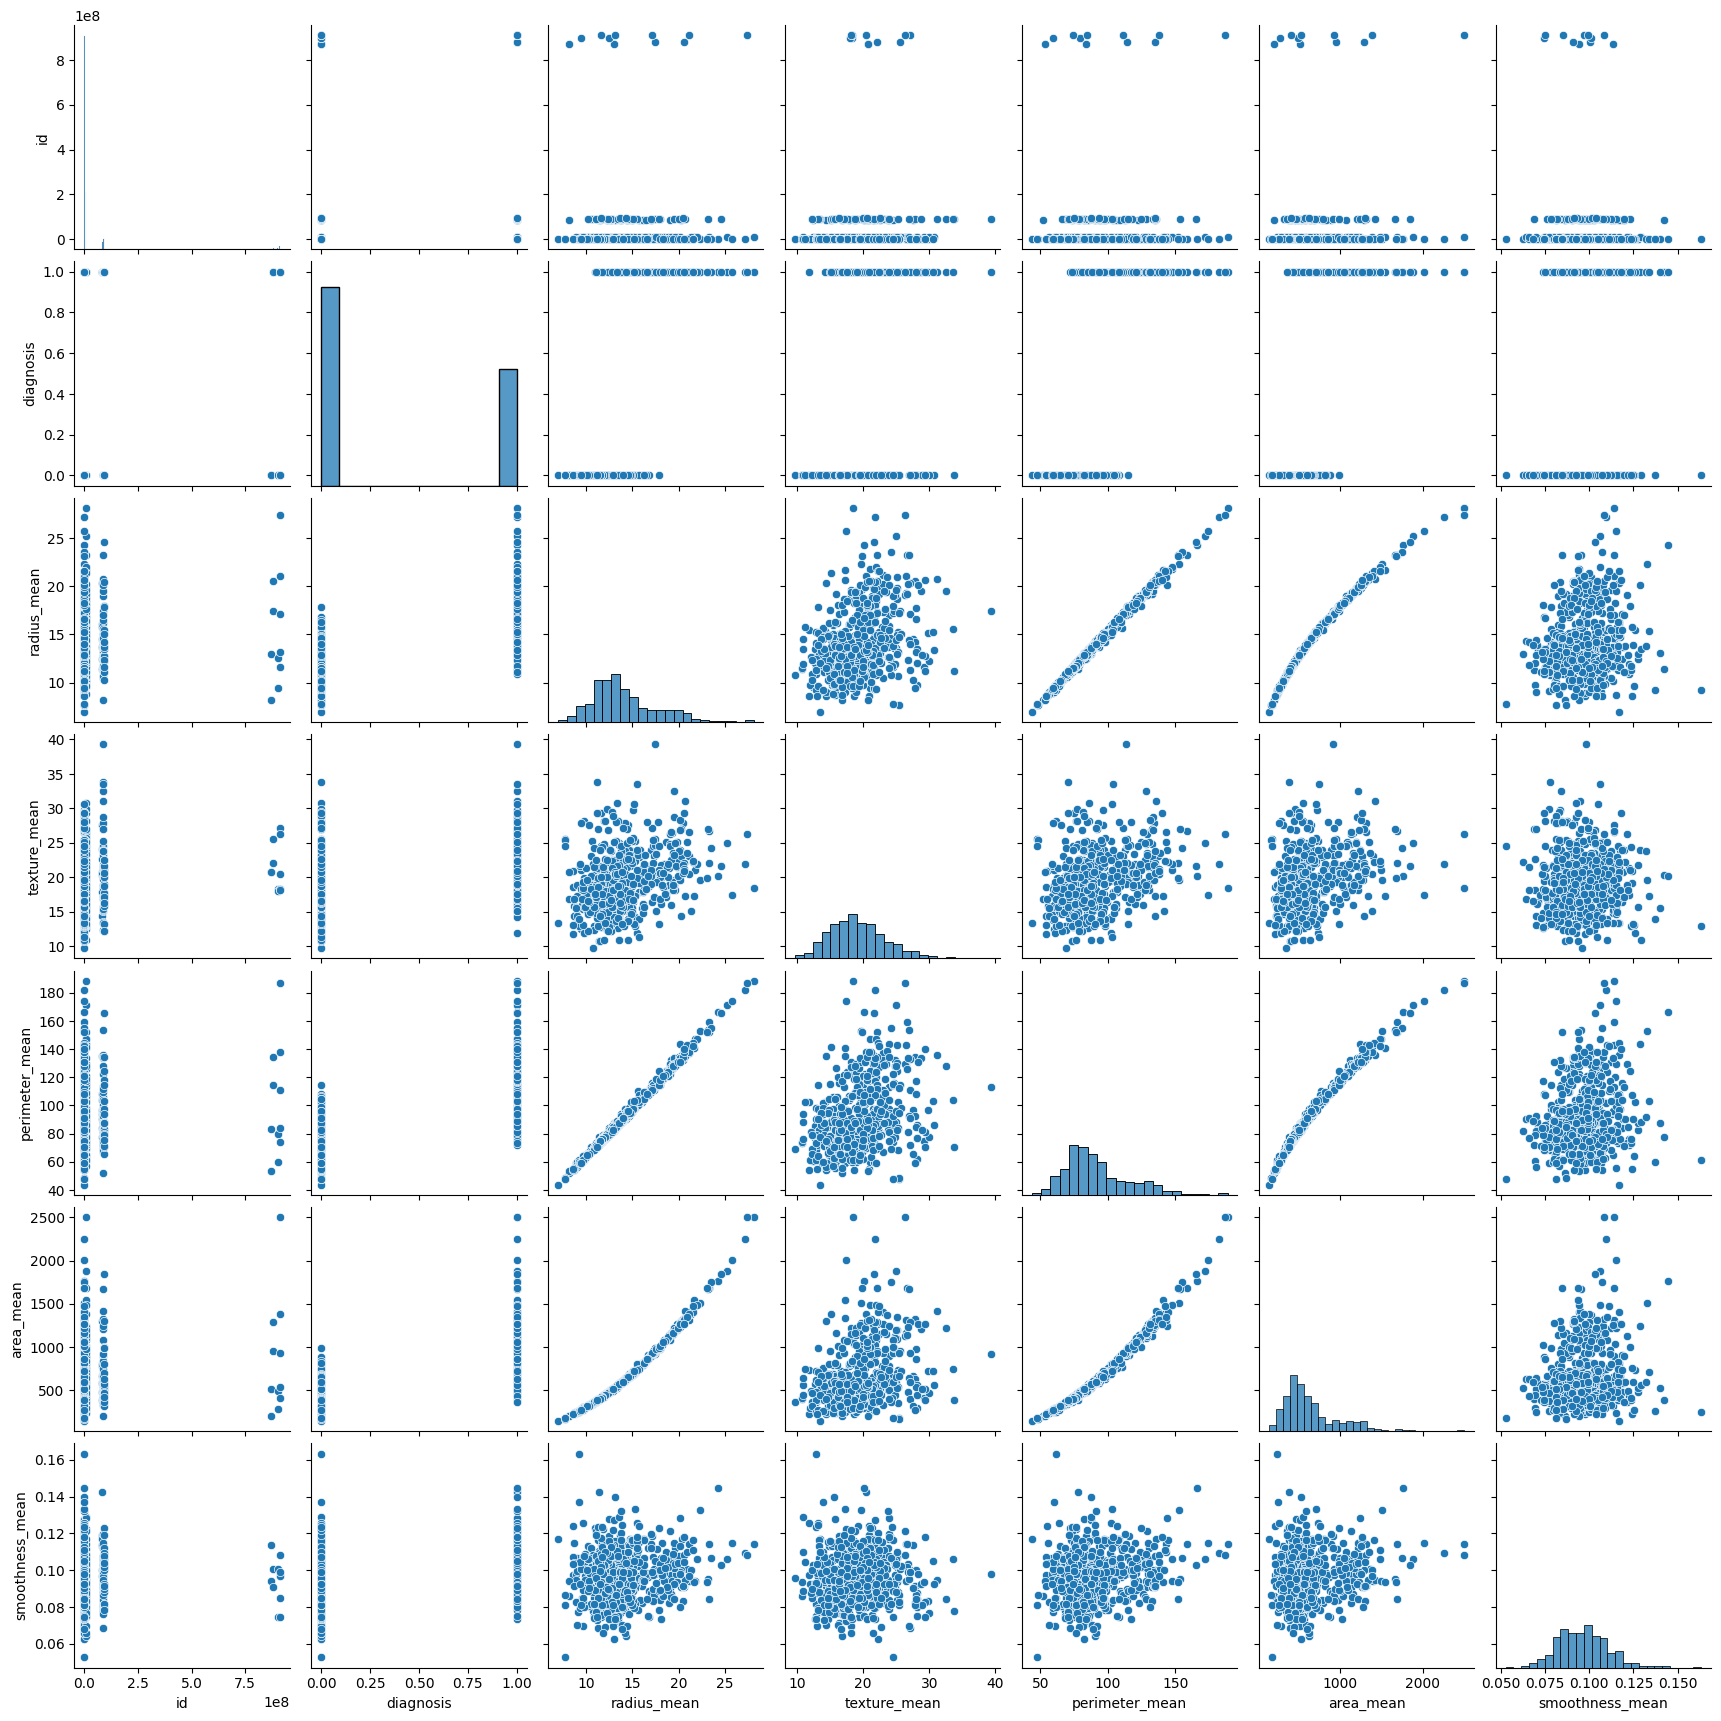

In [60]:
df_subset = df.iloc[3:, :7]

# Generate the pairplot for the first three columns
sns.pairplot(df_subset)

# Show the plot
plt.show()

normalising the dataframe

In [61]:
scaler=MinMaxScaler()
df2=df.copy()
df2=scaler.fit_transform(df)
df2=pd.DataFrame(df2)
df2.describe()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.033318,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.137187,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000944,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000985,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.009661,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df2.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.03,0.37,0.34,0.32,0.33,0.22,0.39,0.26,0.21,0.24,...,0.30,0.36,0.28,0.17,0.40,0.22,0.22,0.39,0.26,0.19
std,0.14,0.48,0.17,0.15,0.17,0.15,0.13,0.16,0.19,0.19,...,0.17,0.16,0.17,0.14,0.15,0.15,0.17,0.23,0.12,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.22,0.22,0.22,0.12,0.30,0.14,0.07,0.10,...,0.18,0.24,0.17,0.08,0.30,0.12,0.09,0.22,0.19,0.11
50%,0.00,0.00,0.30,0.31,0.29,0.17,0.39,0.22,0.14,0.17,...,0.25,0.36,0.24,0.12,0.40,0.18,0.18,0.34,0.25,0.16
75%,0.01,1.00,0.42,0.41,0.42,0.27,0.48,0.34,0.31,0.37,...,0.39,0.47,0.37,0.22,0.49,0.30,0.31,0.55,0.32,0.24
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [63]:
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [64]:
print(df2.columns)


RangeIndex(start=0, stop=32, step=1)


setting target and feature variables and splliting the train and test data

In [65]:

selected_indices = [2, 4, 8, 9, 22, 24, 25, 29]  

selected_indices = [i for i in selected_indices if i < len(df.columns)]


top_features = df2.columns[selected_indices]

print("Top correlated features:", top_features)

X = df2[top_features]
#y = df2[target_column]
y = df2[1]

import pandas as pd

print(y.dtype)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Top correlated features: Index([2, 4, 8, 9, 22, 24, 25, 29], dtype='int64')
float64


using SVC finding predictions

In [66]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test)


evaluating the predictions and making a Confusion Matrix and clasification report

In [67]:
report1 = classification_report(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix1}')
print('')
print('')

print(f'clasification report:\n{report1}')

Confusion Matrix:
[[60  1]
 [ 6 47]]


clasification report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        61
         1.0       0.98      0.89      0.93        53

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



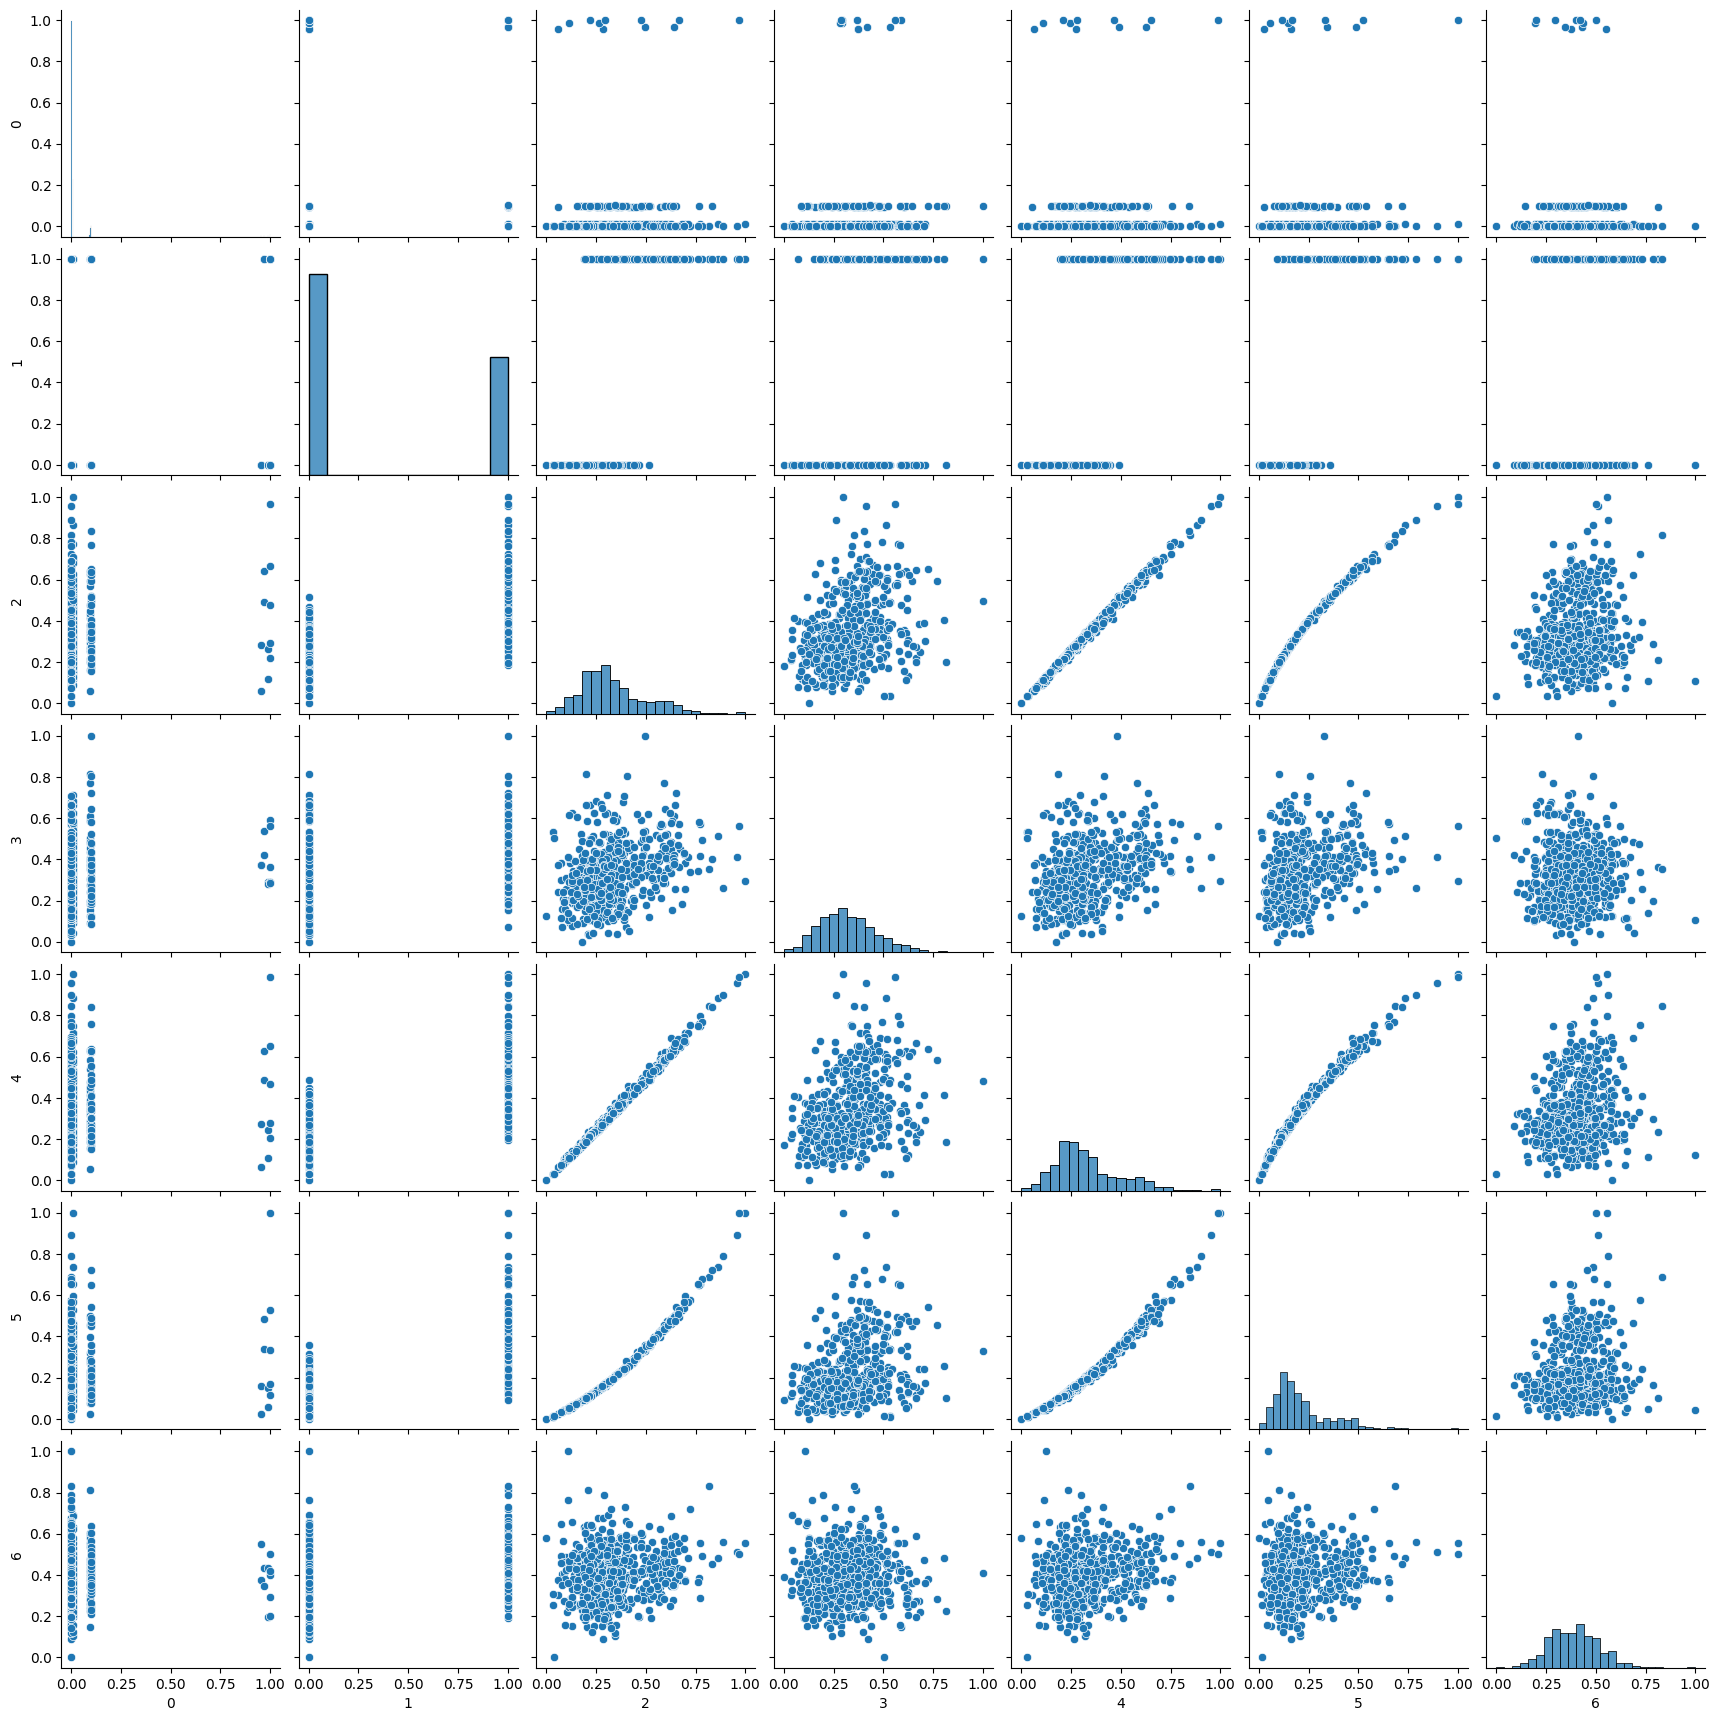

In [68]:
df_subset1 = df2.iloc[3:, :7]

# Generate the pairplot for the first three columns
sns.pairplot(df_subset1)

# Show the plot
plt.show()

Making df3 (to compare df df2 abd df3) and Standardizing the Dataframe

In [69]:
df3=df.copy()

non_numeric_cols = df[df.columns[:2]]  # Assuming 'id' and 'category' are non-numeric

# Standardize numeric columns (starting from index 2)
scaler = StandardScaler()
numeric_data = df[df.columns[2:]]  # Select all numeric columns from index 2 onwards
numeric_data_scaled = scaler.fit_transform(numeric_data)
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns)

# Concatenate non-numeric columns with standardized numeric columns
df3 = pd.concat([non_numeric_cols, numeric_data_scaled_df], axis=1)

df3.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,True,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,True,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,True,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,True,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,True,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [70]:
df3.describe().round(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,3.037183e+07,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.250206e+08,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,8.670000e+03,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,...,-1.73,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60
25%,8.692180e+05,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,...,-0.67,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69
50%,9.060240e+05,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,...,-0.27,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22
75%,8.813129e+06,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,...,0.52,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45
max,9.113205e+08,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,...,4.09,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85


In [71]:
df3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,True,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,True,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,True,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,True,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,True,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


setting target and feature variables and splliting the train and test data

In [72]:
selected_indices = [2, 4, 8, 9, 22, 24, 25, 29]  

selected_indices = [i for i in selected_indices if i < len(df.columns)]


top_features = df3.columns[selected_indices]

print("Top correlated features:", top_features)

X = df3[top_features]
#y = df2[target_column]
y = df3['diagnosis']

import pandas as pd

print(y.dtype)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Top correlated features: Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')
bool


using SVC finding predictions

In [73]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test)


evaluating the predictions and making a Confusion Matrix and clasification report

In [74]:
report2 = classification_report(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix2}')
print('')
print('')

print(f'clasification report:\n{report2}')

Confusion Matrix:
[[73  2]
 [ 3 36]]


clasification report:
              precision    recall  f1-score   support

       False       0.96      0.97      0.97        75
        True       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



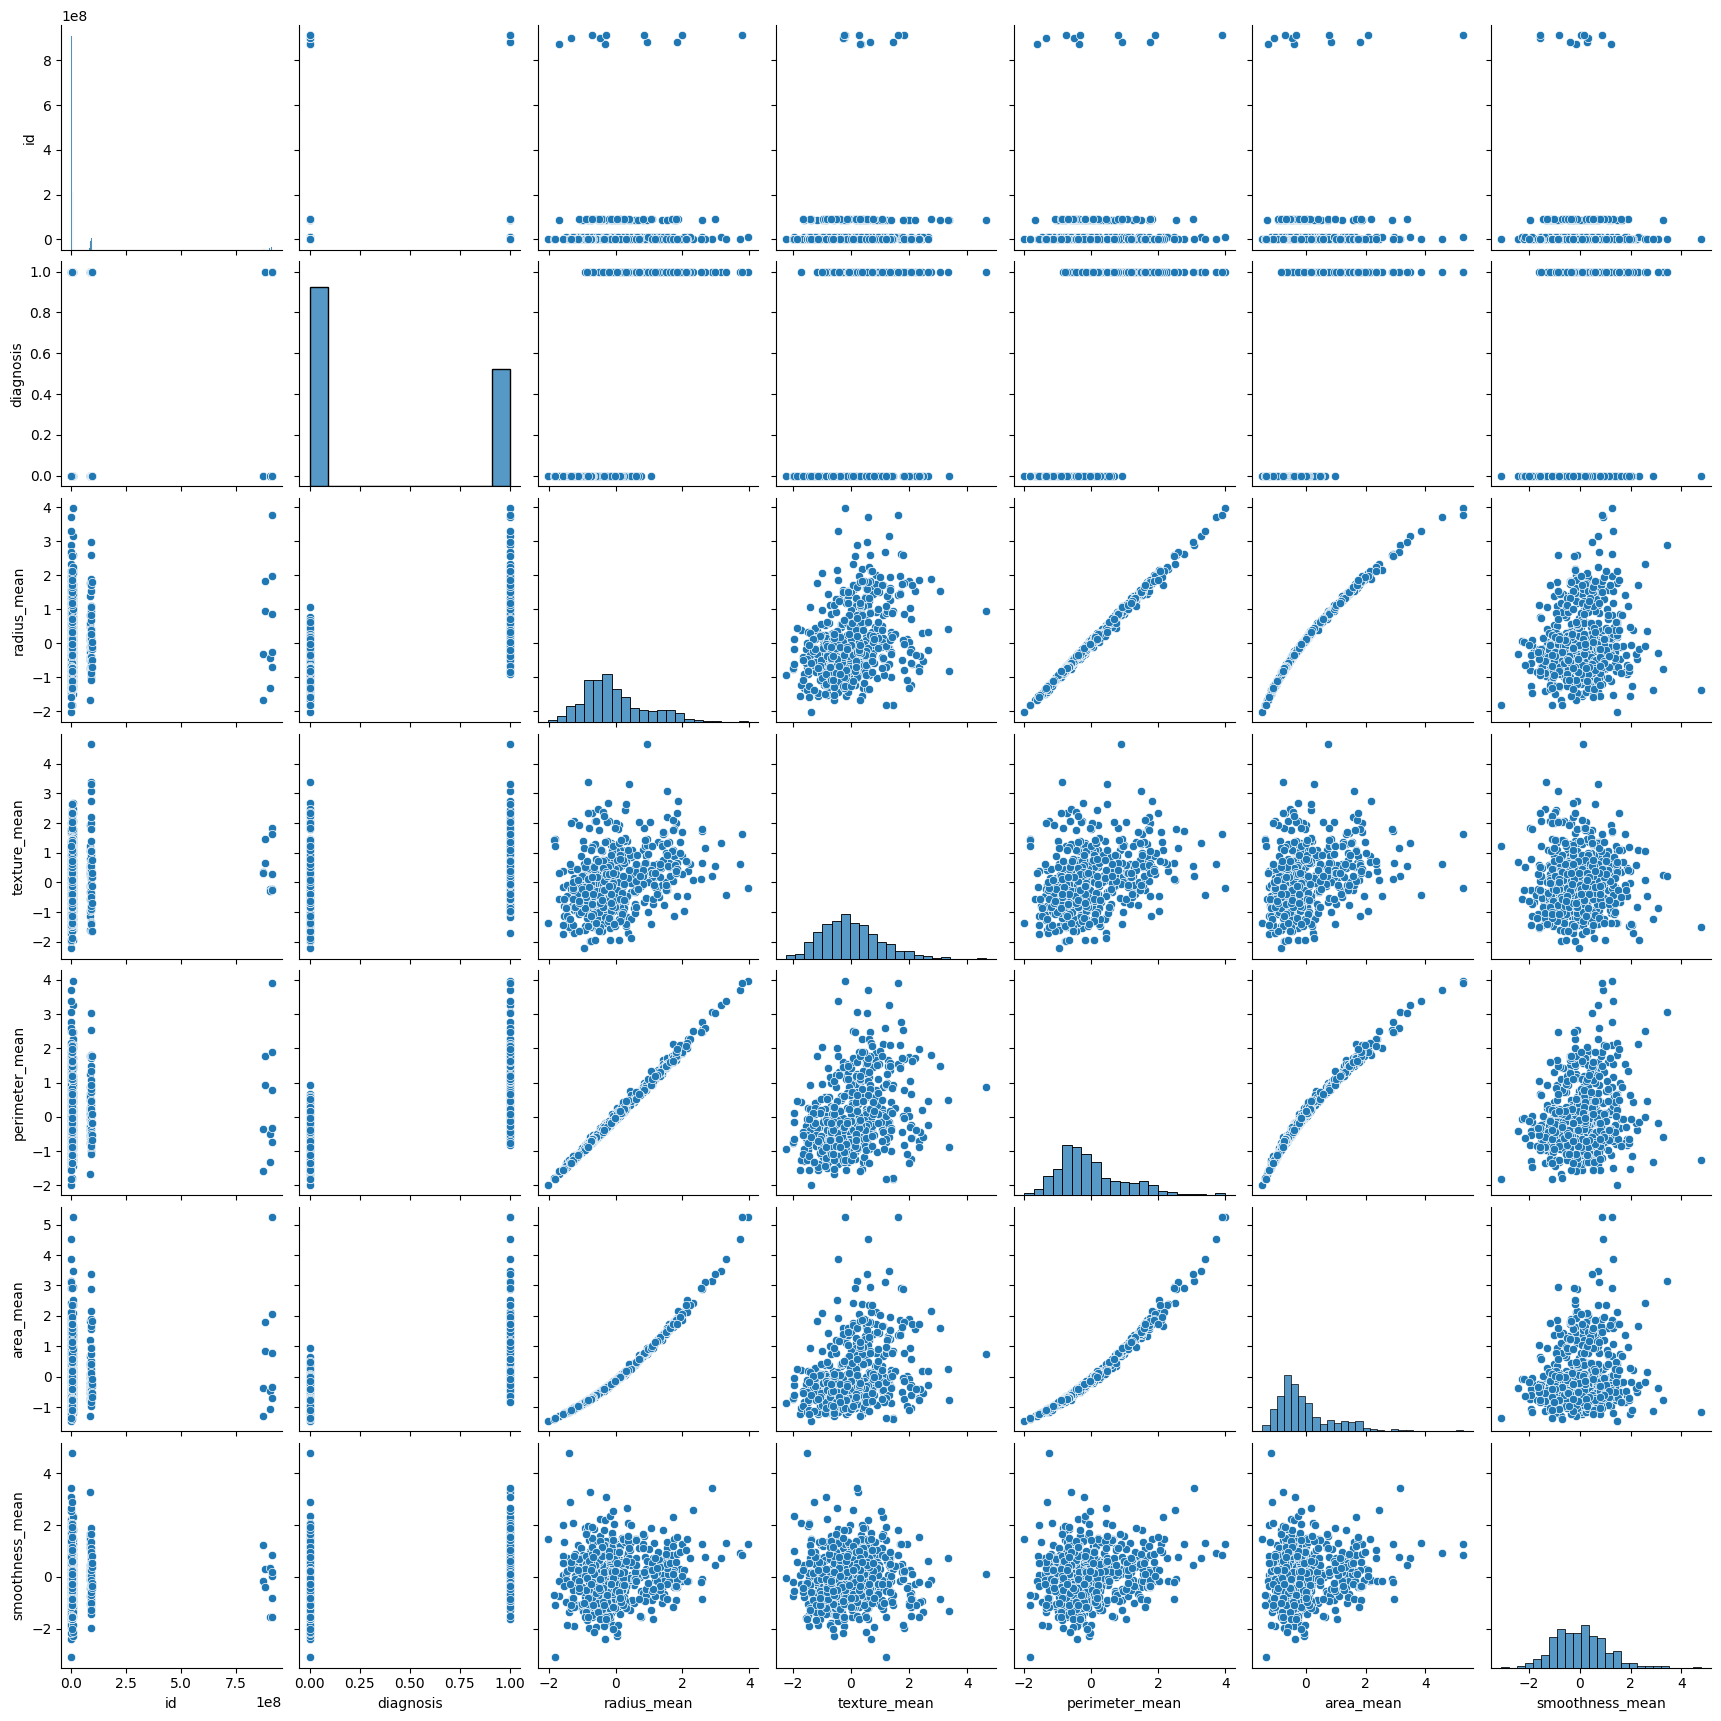

In [75]:
df_subset2 = df3.iloc[3:, :7]

# Generate the pairplot for the first three columns
sns.pairplot(df_subset2)

# Show the plot
plt.show()

appling Regularization to the dataframe using gridview. implementing SVC model

In [76]:
svm_model = SVC()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix2}')
print('')
print('')
print(classification_report(y_test, y_pred))

Best parameters found:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.96
Confusion Matrix:
[[72  3]
 [ 2 37]]


              precision    recall  f1-score   support

       False       0.97      0.96      0.97        75
        True       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

